# FordGoBike Data
## by Abdullah alnoamany

## Preliminary Wrangling



In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib

%matplotlib inline

In [3]:
pd.options.display.max_colwidth = 900
pd.options.display.max_rows = 118

## Gathering Data

In [4]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde St),37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at 3rd St),37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


## Assessing Data

In [6]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
71753,771,2017-12-05 16:24:07.2270,2017-12-05 16:36:59.2120,277,Morrison Ave at Julian St,37.333658,-121.908586,280,San Fernando at 7th St,37.337246,-121.883074,2068,Subscriber
429138,180,2017-08-18 13:03:27.7460,2017-08-18 13:06:28.5520,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,49,S Park St at 3rd St,37.780760,-122.394989,721,Subscriber
234505,734,2017-10-17 13:25:38.1290,2017-10-17 13:37:52.8090,141,Valencia St at Cesar Chavez St,37.747998,-122.420219,105,16th St at Prosper St,37.764285,-122.431804,1531,Subscriber
357547,338,2017-09-11 19:45:56.2720,2017-09-11 19:51:34.6050,49,S Park St at 3rd St,37.780760,-122.394989,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2946,Subscriber
345066,787,2017-09-15 09:14:25.9340,2017-09-15 09:27:33.2180,109,17th St at Valencia St,37.763316,-122.421904,44,Civic Center/UN Plaza BART Station (Market St at McAllister St),37.781074,-122.411738,1786,Subscriber
369401,499,2017-09-07 20:35:56.9220,2017-09-07 20:44:16.2180,243,Bancroft Way at College Ave,37.869360,-122.254337,244,Shattuck Ave at Hearst Ave,37.873792,-122.268618,460,Subscriber
25168,889,2017-12-18 18:33:59.4800,2017-12-18 18:48:48.8620,66,3rd St at Townsend St,37.778742,-122.392741,130,22nd St Caltrain Station,37.757369,-122.392057,3066,Subscriber
290569,1441,2017-10-01 11:37:38.8470,2017-10-01 12:01:40.7430,170,Telegraph Ave at 58th St,37.844493,-122.261351,197,El Embarcadero at Grand Ave,37.808848,-122.249680,570,Subscriber
138821,858,2017-11-13 10:43:49.7360,2017-11-13 10:58:08.1240,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2431,Customer
502506,2059,2017-07-15 07:13:34.7250,2017-07-15 07:47:54.4150,324,Union Square (Powell St at Post St),37.788300,-122.408531,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,332,Customer


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [8]:
df.shape

(519700, 13)

In [9]:
sum(df.duplicated())

0

In [10]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [11]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [12]:
df.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

### Cleaning

In [13]:
dfCopy = df.copy()

In [14]:
dfCopy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde St),37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at 3rd St),37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer


- breckdown the dates columns into more details form 

In [15]:
dfCopy.start_time = pd.to_datetime(dfCopy.start_time)
dfCopy.end_time = pd.to_datetime(dfCopy.end_time)

In [16]:
dfCopy['duration_minute'] = dfCopy['duration_sec']/60
dfCopy['start_hourofday'] = dfCopy.start_time.dt.strftime('%H')
dfCopy['start_dayofweek'] = dfCopy.start_time.dt.strftime('%A')
dfCopy['start_month'] = dfCopy.start_time.dt.strftime('%B')

In [17]:
dfCopy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_minute,start_hourofday,start_dayofweek,start_month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde St),37.778768,-122.415929,96,Customer,1335.166667,16,Sunday,December
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at 3rd St),37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313.333333,15,Sunday,December
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,762.800000,22,Sunday,December
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1036.200000,17,Sunday,December
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,726.716667,14,Sunday,December


In [18]:
dfCopy.drop(columns=['start_time','end_time'] , inplace=True)

In [19]:
dfCopy.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_minute,start_hourofday,start_dayofweek,start_month
0,80110,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde St),37.778768,-122.415929,96,Customer,1335.166667,16,Sunday,December
1,78800,284,Yerba Buena Center for the Arts (Howard St at 3rd St),37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313.333333,15,Sunday,December
2,45768,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,762.800000,22,Sunday,December
3,62172,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1036.200000,17,Sunday,December
4,43603,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,726.716667,14,Sunday,December


In [20]:
dfCopy = dfCopy.reindex(columns=['duration_sec','duration_minute','start_hourofday','start_dayofweek','start_month','start_station_id','end_station_id','start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','bike_id','user_type'])

- just reordering the columns position to be more easy for read

In [21]:
dfCopy.duration_minute = dfCopy.duration_minute.astype('int')

In [22]:
dfCopy.head()

,duration_sec,duration_minute,start_hourofday,start_dayofweek,start_month,start_station_id,end_station_id,start_station_name,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,1335,16,Sunday,December,74,43,Laguna St at Hayes St,San Francisco Public Library (Grove St at Hyde St),37.776435,-122.426244,37.778768,-122.415929,96,Customer
1,78800,1313,15,Sunday,December,284,96,Yerba Buena Center for the Arts (Howard St at 3rd St),Dolores St at 15th St,37.784872,-122.400876,37.766210,-122.426614,88,Customer
2,45768,762,22,Sunday,December,245,245,Downtown Berkeley BART,Downtown Berkeley BART,37.870348,-122.267764,37.870348,-122.267764,1094,Customer
3,62172,1036,17,Sunday,December,60,5,8th St at Ringold St,Powell St BART Station (Market St at 5th St),37.774520,-122.409449,37.783899,-122.408445,2831,Customer
4,43603,726,14,Sunday,December,239,247,Bancroft Way at Telegraph Ave,Fulton St at Bancroft Way,37.868813,-122.258764,37.867789,-122.265896,3167,Subscriber


In [42]:
dfCopy.to_csv('Cleaned_df',index=False)

###### The dataset structure contains data about    :

- duration : in sec and minutes
- start and end station : id , name 
- dates : hours , days  , months
- station geographic : longitude and latitude
- bike_id
- user_type

### What is/are the main feature(s) of interest in your dataset?

<p> The main interest features in the dataset are the duration of the trip in minutes, this shows how much the bike was used. which hour are most of the people use the bike. also, the days, since it can shows which days that most of the people use this system. and user type which can tell us what are the most of people use this system belong to? are they subscribers or not? <p/>


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the facts that are related to the duration and dates

## Univariate Exploration

> In this section, I investigate distributions of individual variables. 

In [23]:
base_color = sb.color_palette()[0]

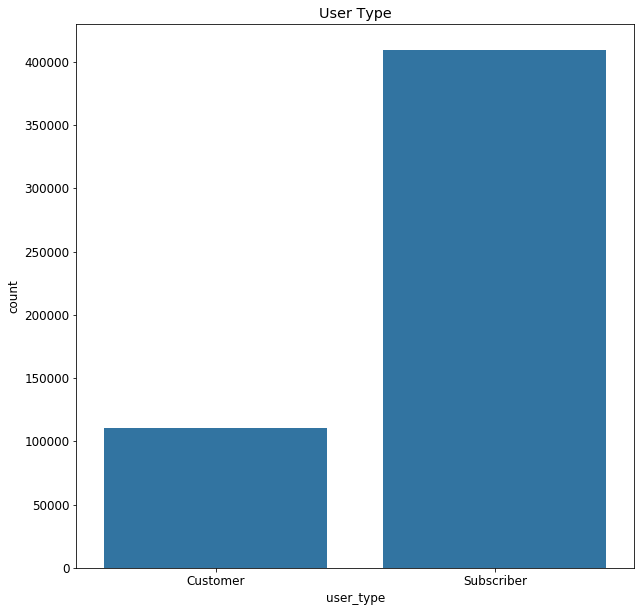

In [40]:
plt.figure(figsize=(10,10))
sb.countplot(data = dfCopy , x = 'user_type' , color=base_color)
plt.title('User Type' );

> most of the users are Subscribers rather than regular customers

In [25]:
top5_day = dfCopy.start_dayofweek.value_counts().head()

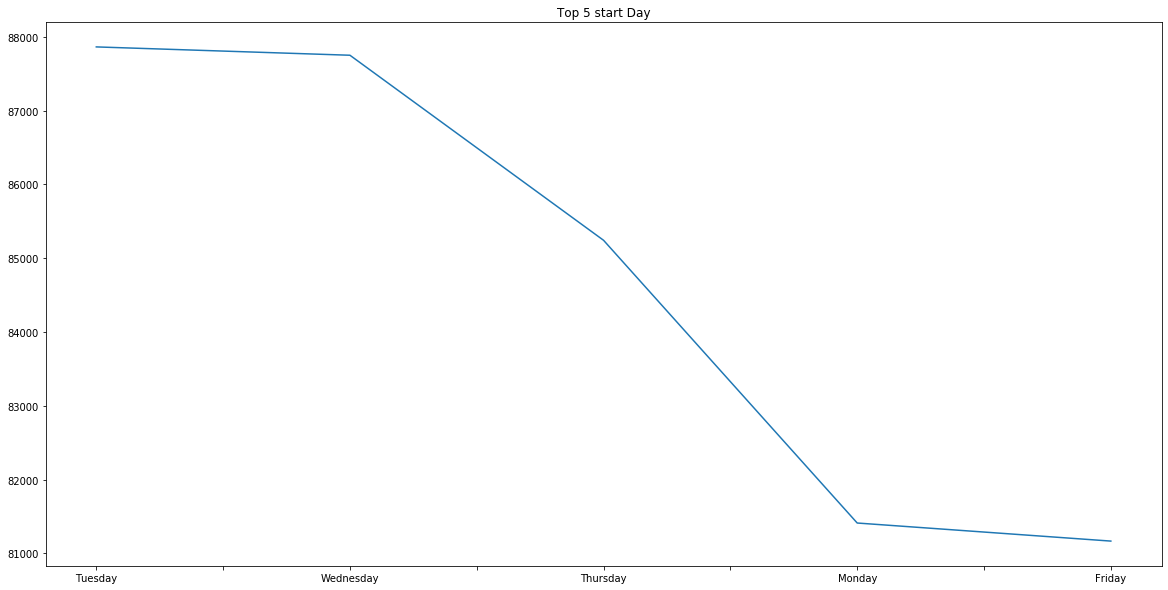

In [26]:
top5_day.plot(kind = 'line' , figsize=(20,10))
plt.title('Top 5 start Day');

> As the figure shows above Tuesday and Wednesday has the most frequent days that peaple use sharing bike system 

In [27]:
top5_hours = dfCopy.start_hourofday.value_counts().index

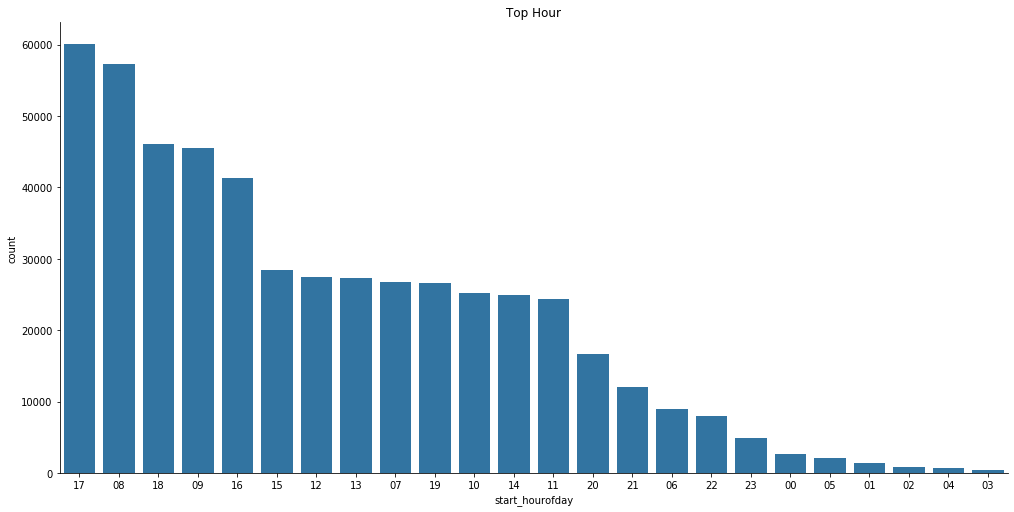

In [28]:
sb.catplot(data= dfCopy , x='start_hourofday',kind='count' , order= top5_hours ,color= base_color ,height=7, aspect=2);
plt.title('Top Hour');

> the start hour are seems like at 17 & 08 is the highest frequent hour that people start at

In [29]:
topStartStation = dfCopy.start_station_id.value_counts().head()
topStartStation

15    15187
6     13664
30    12546
67    12055
58    11960
Name: start_station_id, dtype: int64

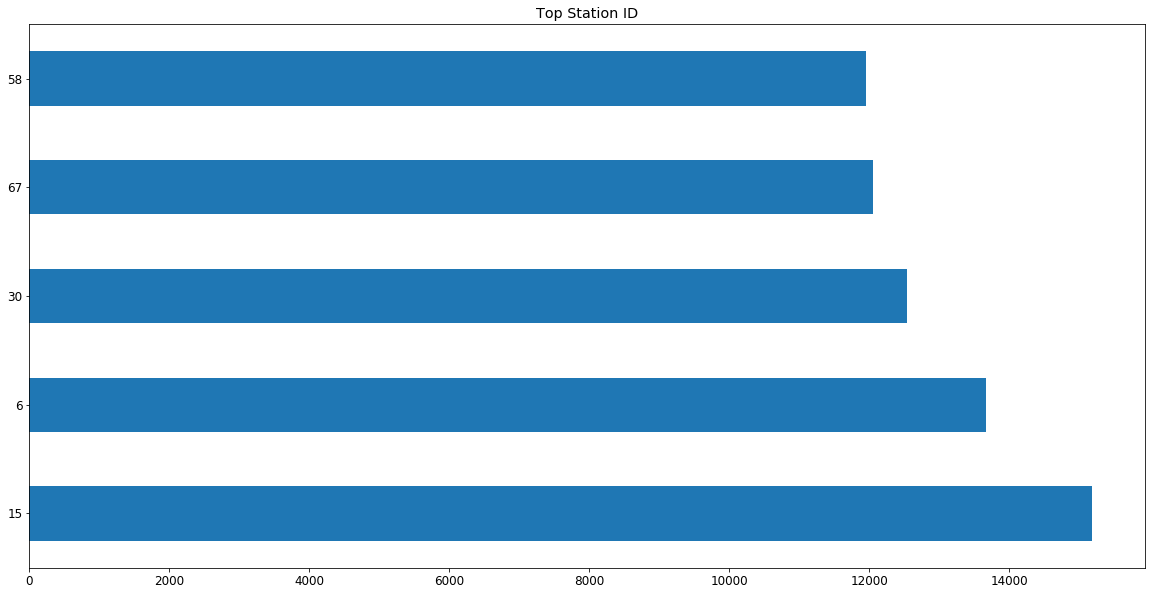

In [30]:
font = {'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
topStartStation.plot(kind='barh', figsize=(20,10) )
plt.title('Top Station ID');

> The station ID = 15, is the highest station that peaple start from

###  the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I only change the form of dates into day and hours and monthes in seperate columns. and reorder the position of each column

## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the data.

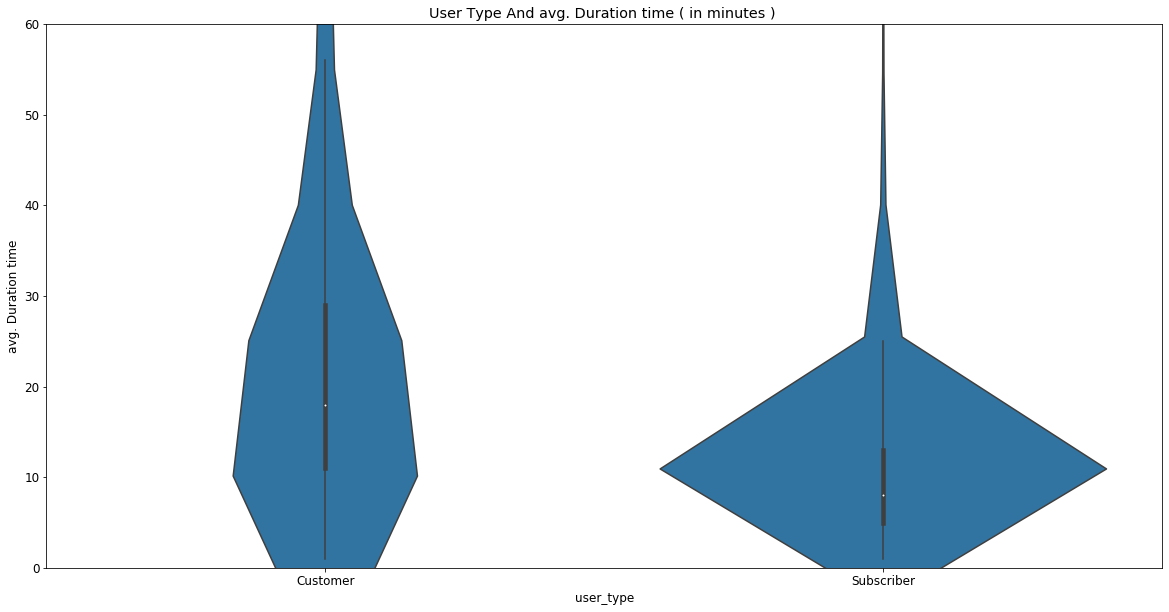

In [31]:
plt.figure(figsize=(20,10))
sb.violinplot(data = dfCopy , x = 'user_type' ,y= dfCopy.duration_minute, color=base_color )
plt.ylim(0,60)
plt.title('User Type And avg. Duration time ( in minutes ) ');
plt.ylabel('avg. Duration time');

> We found in univariate part that the subscribers are more than regular customers, but here we found out the average time spending for regular customers are higher than the subscribers.

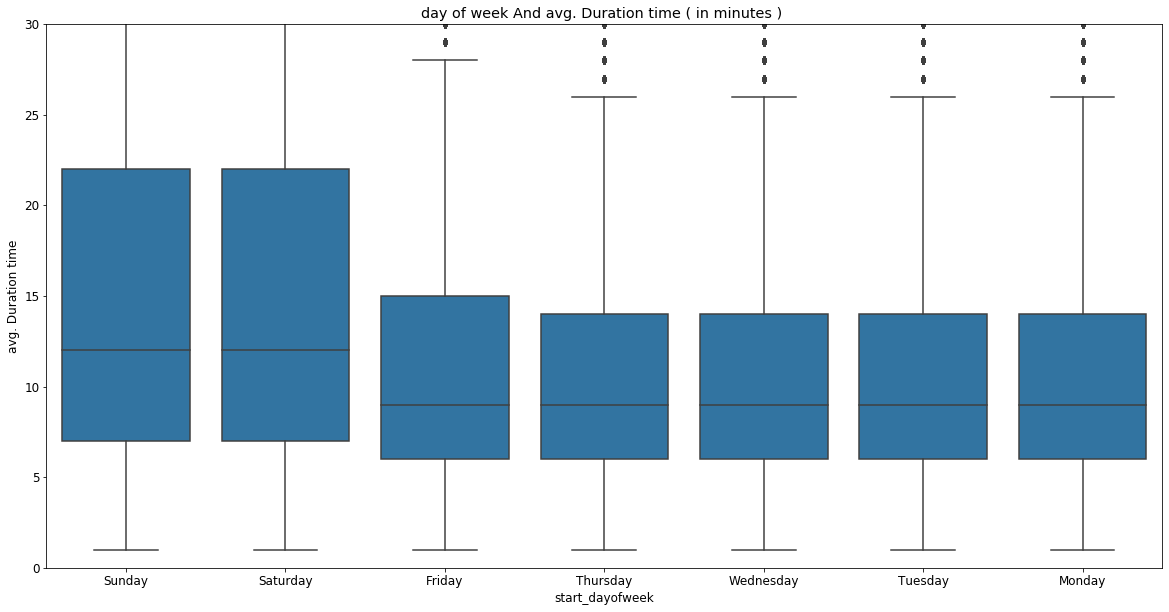

In [32]:
plt.figure(figsize=(20,10))
sb.boxplot(data = dfCopy , x = dfCopy.start_dayofweek ,y= dfCopy.duration_minute, color=base_color )
plt.ylim(0,30)
plt.title('day of week And avg. Duration time ( in minutes ) ');
plt.ylabel('avg. Duration time');

> The avg time people spending in using bikes in Saturday & Sunday  are higher rather than other days

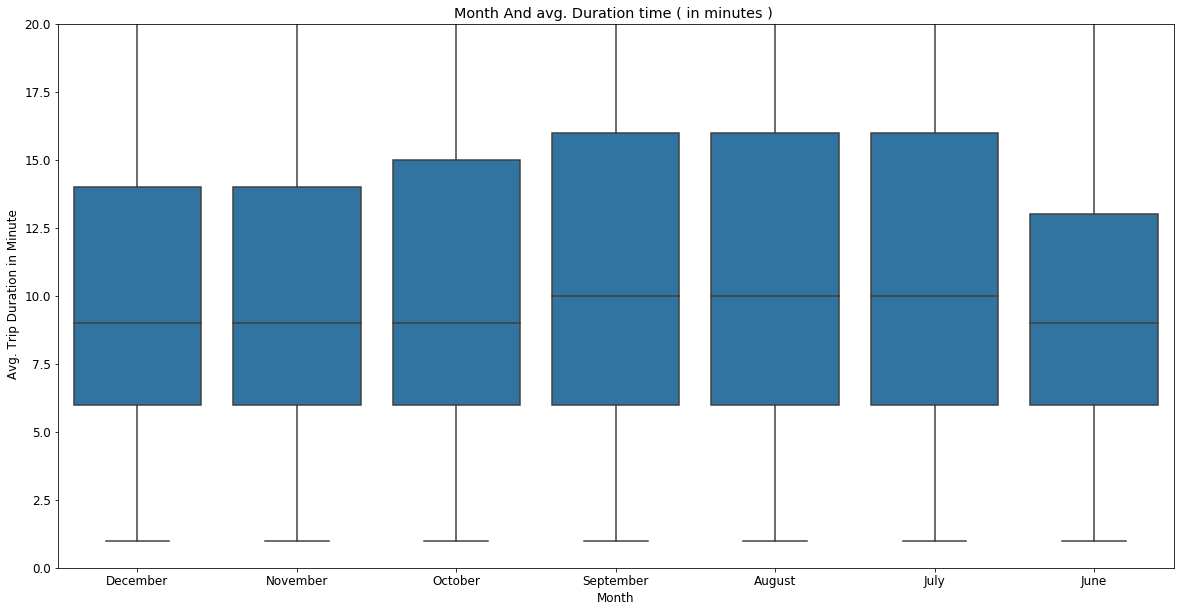

In [33]:
plt.figure(figsize=(20,10))
sb.boxplot(data=dfCopy, x='start_month', y='duration_minute', color=base_color);
plt.ylim(0,20)
plt.xticks(rotation=0);
plt.xlabel('Month');
plt.title('Month And avg. Duration time ( in minutes ) ')
plt.ylabel(' Avg. Trip Duration in Minute');

> The records shows that the avg minutes in September , August and July are higher than other months

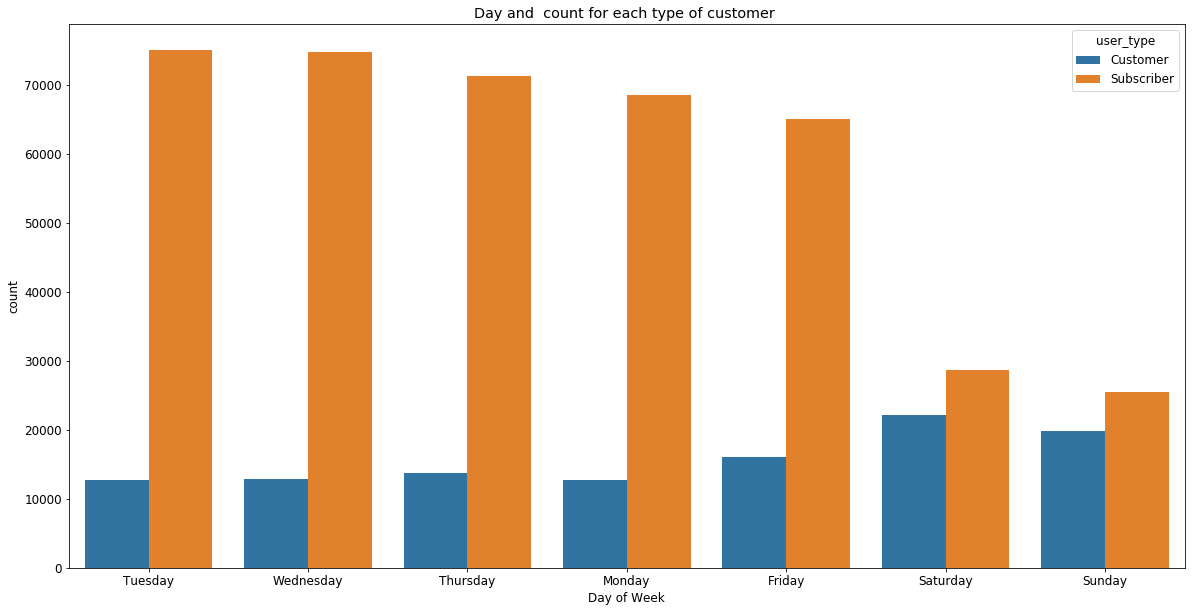

In [34]:
plt.figure(figsize=(20,10))
sb.countplot(data=dfCopy, x='start_dayofweek', hue='user_type',order = dfCopy['start_dayofweek'].value_counts().index);
plt.xlabel('Day of Week');
plt.title('Day and  count for each type of customer ');

> as we can see, tuesday and wednesday are top in amount of using bikes, the amount of customer in saturday & sunday are nearly to the subscribers with slightly different.

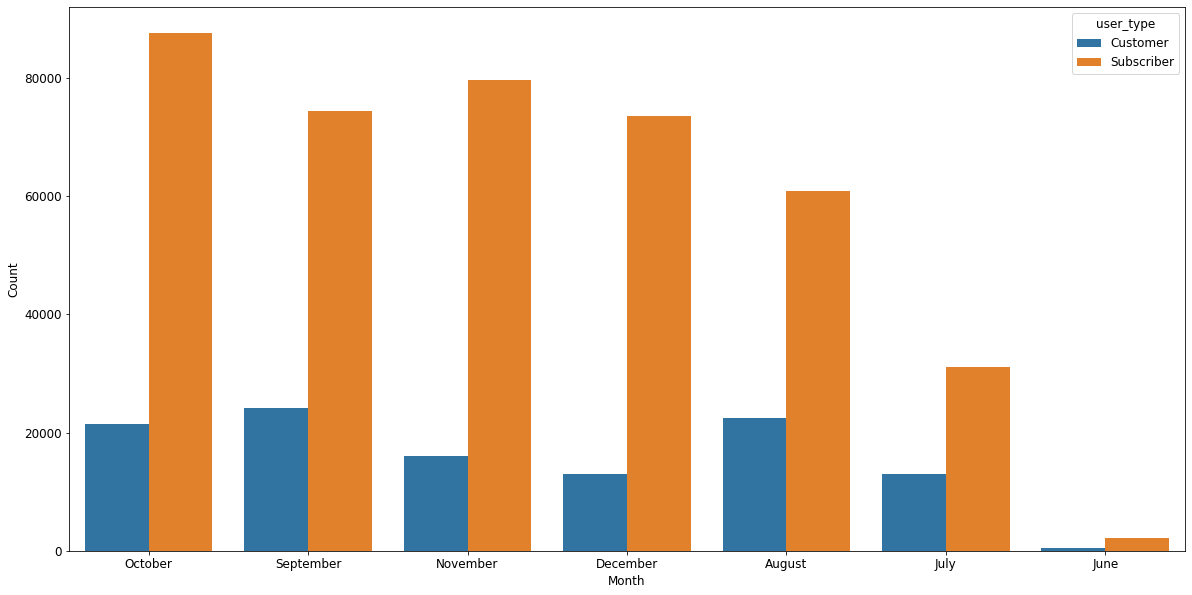

In [35]:
plt.figure(figsize=(20,10))
sb.countplot(data=dfCopy, x='start_month', hue='user_type',order = dfCopy['start_month'].value_counts().index);
plt.xlabel('Month');
plt.ylabel('Count');

> figure shows that October has the highest amounts of records coming after that September. June get's the minimum level of usage.

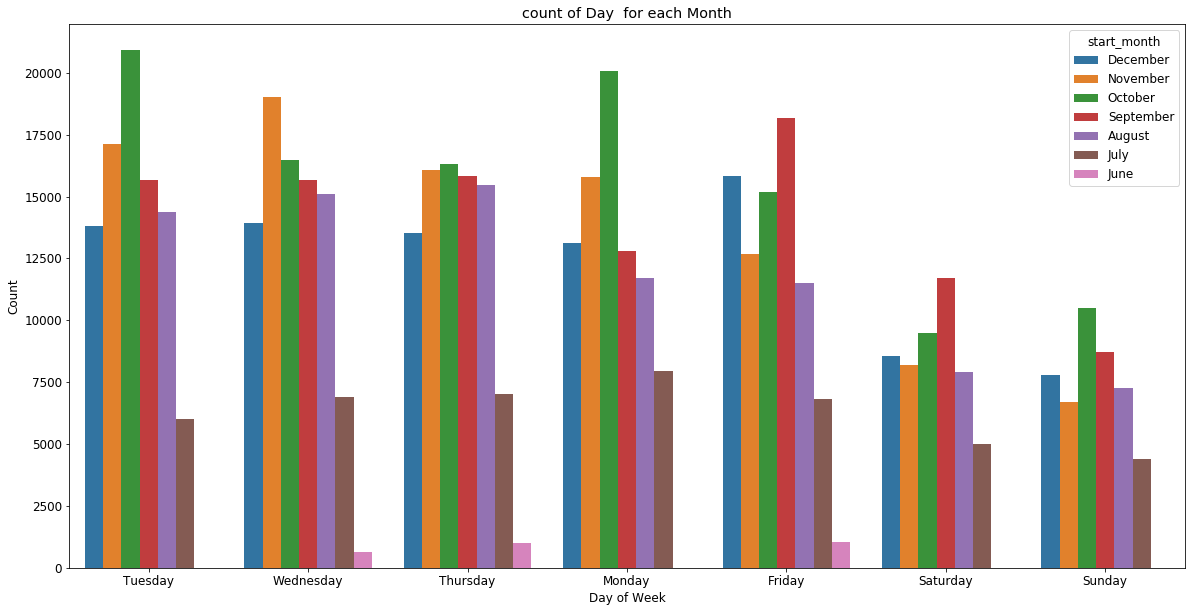

In [36]:
plt.figure(figsize=(20,10))
sb.countplot(data=dfCopy, x='start_dayofweek', hue='start_month',order = dfCopy['start_dayofweek'].value_counts().index);
plt.xlabel('Day of Week');
plt.ylabel('Count');
plt.title('count of Day  for each Month');

> This figure prove to us that the days Tuesday and Wednesday in all months are the top days with higher users of bikes system. also Saturday and sunday in all months they are the lowest.



- We found in univariate part that the subscribers are more than regular customers, but here we found out the average time spending for regular customers are higher than the subscribers.
- The avg time people spending in using bikes in Saturday & Sunday are higher rather than other days
- The records shows that the avg minutes in September , August and July are higher than other months
-  tuesday and wednesday are the top in amount of using bikes, the amount of customer in saturday & sunday are nearly to the subscribers with slightly different.
-  October has the highest amounts of records coming after that September. June get's the minimum level of usage.



## Multivariate Exploration

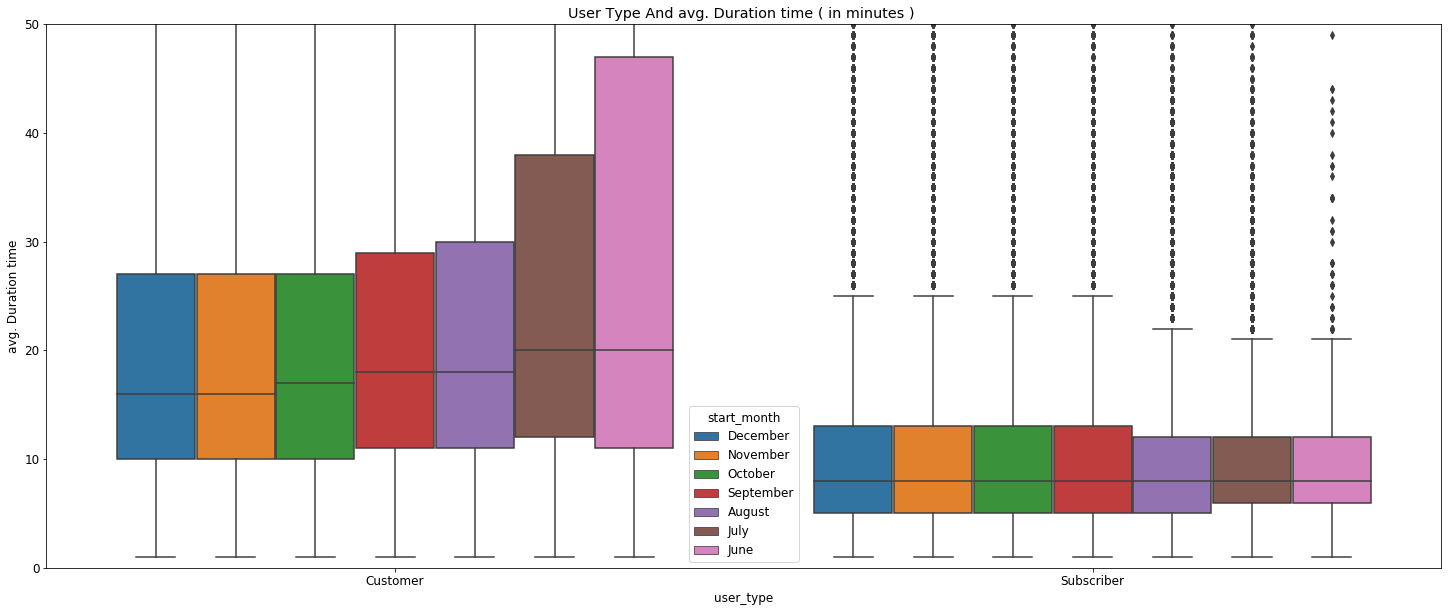

In [37]:
plt.figure(figsize=(25,10))
sb.boxplot(data = dfCopy , x = 'user_type' ,y= dfCopy.duration_minute, hue='start_month' )
plt.ylim(0,50)
plt.title('User Type And avg. Duration time ( in minutes ) ');
plt.ylabel('avg. Duration time');

> The avg duration time for regular customars are higher in june and july, coming after that august and september. for subscribers almost all months are close to each either.

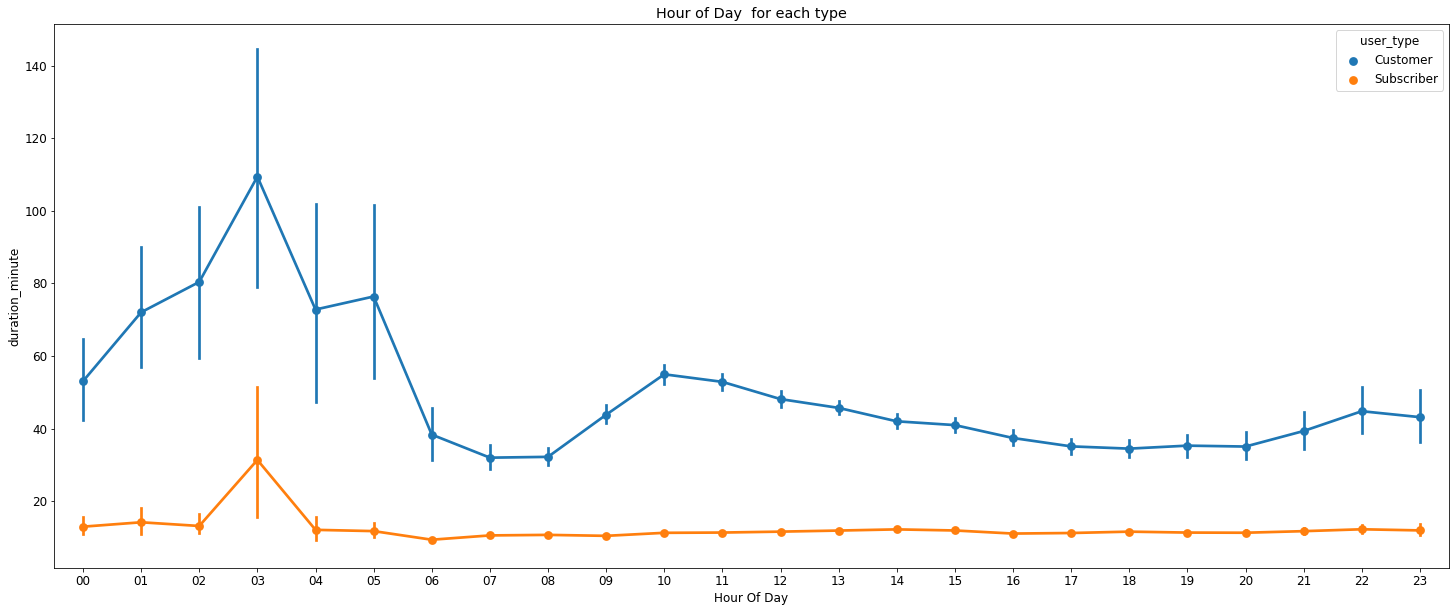

In [39]:
plt.figure(figsize=(25,10))
sb.pointplot(data=dfCopy, x='start_hourofday', y= 'duration_minute'  , hue='user_type');
plt.xlabel('Hour Of Day');
plt.title('Hour of Day  for each type');

> The relationship shows that the people who start use the bikes system at 03:00  hour has the maximum avg duration for both types of people Customers and subscribers.

### Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The avg duration time for regular customars are higher in june and july, coming after that august and september. for subscribers almost all months are close to each either.
- The relationship shows that the people who start use the bikes system at 03:00 hour has the maximum avg duration for both types of people Customers and subscribers.

### Were there any interesting or surprising interactions between features?

- The most interesting relationship we found is the last point which shows most people whos start using the bike's system at 3:00,   they have the highest avg duration time for both types of people. in general, between 1:00 to 5:00 is the most times that people have high avg duration time.